#ARIMA Model (Auto Regressive Integrated Moving Average)
ARIMA model is good only on stationary dataset. It can not perform good on non-stationary dataset. For that we have 'd' parameter in ARIMA model which transforms non-stationary data to stationary data. Order is (p,d,q)

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller # adfuller checks if data is stationary or non-stationary (Augmented Dickey-Fuller (ADF) test)
from pmdarima import auto_arima # from auto_arima we will get order of p,d,q
from statsmodels.tsa.arima.model import ARIMA # ARIMA function for model building
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('DailyTemps.csv',index_col='DATE',parse_dates=True)#parse_dates=True tells python that index column is date time column
df
# Here we are converting DATE column as index for visualization purpose
# we want to predict avg temp for next few days or months. So we are only going to work with AvgTemp column

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [28]:
df.dropna(inplace=True)

**Check if Data is stationary or not**
How to check? - Plot the Data

We can directly conclude that
if No Trend - data is Stationary


<Axes: xlabel='DATE'>

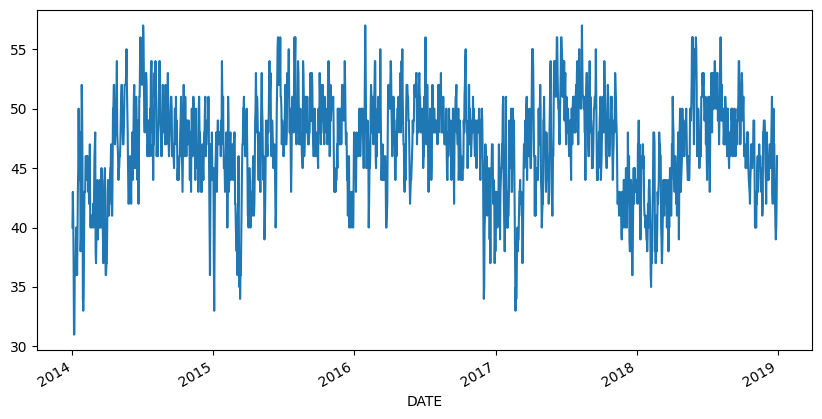

In [29]:
df['AvgTemp'].plot(figsize=(10,5))

Here No Trend is present so data is Stationary. Here if mean is computed it will come around 46 to 47.

Majority of data points are around 45 to 50. There should not be huge difference between mean of 2014 and mean of 2015.

It will not same every year but it should be near to each other. Then we can call it as a Stationary data.

But we can't completely rely on visualizations only.
So to make sure that data is Non-Stationary we will use adfuller test.

In [30]:
# Function Definition:
#def ad_test(dataset):
#  dftest = adfuller(dataset,autolag='AIC')
#  #AIC is the number which will help me to tell whether model is performing good or not. (Not much imp. here. We will see it in ARIMA)
#  print("P-Value: ", dftest[1])# dftest[1]: index of p-value is 1.

#ad_test(df['AvgTemp'])#Function call

#adfuller() test gives you different values like p-value, t-value, alpha. But we want only p-value.
# based on that we will decide whether data is stationary or non-stationary
# If p<0.05 then Data is Stationary
# If p>0.05 then Data is Non-Stationary

P-Value:  8.675937480199653e-09


In [32]:
# without writing user defined function ad_test we can calculate p-value with adfuller()
dftest=adfuller(df['AvgTemp'])
print("P-Value: ", dftest[1])

P-Value:  8.675937480199653e-09


**Here p-value is approximately = 0. Here p<0.05. So Data is Stationary.**

So we can start with model building.

# **ARIMA Model Building**

ARIMA is composed of 3 terms: (AutoRegression (p) + Integraded (d) + Moving Avg (q))

First we need to find out the order of ARIMA model.

In [33]:
stepwise_fit = auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
# auto_arima() function returns all these values p,d,q
# trace=True gives all possible combinations that auto_arima()function is going to take
# ignore warnings.
# Function takes combination of p,d,q values, whichever combinations gives minimum AIC value
# Akaike’s Information Criterion (AIC), which was useful in selecting predictors for regression,
# is also useful for determining the order of an ARIMA model.
# AIC is kind of error metric for ARIMA model. Lesser AIC - Better the model.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=3.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=3.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.94 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=3.87 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=5.54 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=3.71 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=4.57 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=6.48 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=5.40 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=6.60 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

Best Model: p:1, d:0, q:5 Min AIC: 8295.034





Why d=0? Data is already Stationary so no need to do differencing.

In [35]:
# Create ARIMA model
# Split the data
train = df.iloc[:-30]
test = df.iloc[-30:] # last 30 records for testing purpose
print(train.shape,test.shape)

(1791, 5) (30, 5)


In [36]:
model = ARIMA(train['AvgTemp'],order=(1,0,5)) # goal is predict avg. temp.
model = model.fit()
#model.summary()

# **Evaluating the Model**

In [37]:
test

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-01,36.0,52.0,44.0,640,1743
2018-12-02,33.0,51.0,42.0,641,1743
2018-12-03,36.0,53.0,45.0,641,1743
2018-12-04,39.0,56.0,48.0,642,1743
2018-12-05,36.0,53.0,45.0,643,1743
2018-12-06,36.0,52.0,44.0,643,1743
2018-12-07,37.0,53.0,45.0,644,1744
2018-12-08,34.0,53.0,44.0,645,1744
2018-12-09,36.0,53.0,45.0,645,1744


In [42]:
pred.index

RangeIndex(start=1791, stop=1821, step=1)

In [38]:
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
# as sequential data we need to give date

pred = model.predict(start = 1791, end = 1820) # test data is starting from index 1791 to 1820.(last 30 records)

#pred.index = index_future_dates

In [39]:
index_future_dates

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', freq='D')

In [41]:
from math import sqrt
#test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse) # very less error - near to 0. So ARIMA model is good

3.000463825206671


In [20]:
pred

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933418
1803    45.942808
1804    45.952063
1805    45.961185
1806    45.970175
1807    45.979036
1808    45.987769
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045481
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075922
1820    46.083261
Name: predicted_mean, dtype: float64